# Exploring  PySpark to Perform Some Basic Techniques

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.8/310.8 MB 2.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.4.1-py2.py3-none-any.whl size=311285387 sha256=190013783ce589aadda92904dff67ebb02eebebbd16b0e69b6e7e4fcee88fec7
  Stored in directory: /root/.cache/pip/wheels/0d/77/a3/ff2f74cc9ab41f8f594dabf0579c2a7c6de920d584206e0834
Successfully built pyspark


In [ ]:
import pyspark

In [ ]:
import os

os.chdir('/content/drive/MyDrive/DE_SOLUTION_Mohammed_Aftab.')


### Load The Data

In [ ]:
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName("DE_Pyspark").getOrCreate()

csv_file_path = "/content/drive/MyDrive/DE_SOLUTION_Mohammed_Aftab./HousingDataset.csv"

df = spark.read.csv(csv_file_path, header=True, inferSchema=True)

df.show()


+--------------------+--------------------+--------------------+--------------------+-----------+----------+--------------------+--------------------+--------------------+--------------------+-------------------+----+----+----+-----+--------+---------+-------------+---------------+--------+--------+------------+--------------------+--------------------+-------------+--------------+
|                 _c0|                  id|             ad_type|          start_date|   end_date|created_on|                 lat|                 lon|                  l1|                  l2|                 l3|  l4|  l5|  l6|rooms|bedrooms|bathrooms|surface_total|surface_covered|   price|currency|price_period|               title|         description|property_type|operation_type|
+--------------------+--------------------+--------------------+--------------------+-----------+----------+--------------------+--------------------+--------------------+--------------------+-------------------+----+----+----+---

### Data Preprocessing

In [ ]:

columns_to_remove = ['ad_type', 'title', 'description', 'l4', 'l5', 'l6']
df = df.drop(*columns_to_remove)


In [ ]:
columns_to_check = ['lon', 'lat', 'price_period', 'bedrooms', 'surface_total', 'rooms', 'price', 'surface_covered']
df = df.dropna(subset=columns_to_check)


In [ ]:

columns_to_select = ['id', 'start_date', 'end_date', 'created_on', 'lat', 'lon', 'l1', 'l2', 'l3', 'rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered']
property_details = df.select(columns_to_select)


In [ ]:
columns_to_select = ['id', 'price', 'currency', 'price_period', 'property_type', 'operation_type']
property_price_details = df.select(columns_to_select)


In [ ]:
property_details.show(5)

+--------------------+------------+------------+------------+---------------+-----------+--------------------+--------------------+---------------+---------+--------------------+--------------------+-------------+--------------------+
|                  id|  start_date|    end_date|  created_on|            lat|        lon|                  l1|                  l2|             l3|    rooms|            bedrooms|           bathrooms|surface_total|     surface_covered|
+--------------------+------------+------------+------------+---------------+-----------+--------------------+--------------------+---------------+---------+--------------------+--------------------+-------------+--------------------+
|5Be4XjP4b1Olk02vX...|  2020-07-31|  2020-08-28|  2020-07-31|    -34.5575633|-58.4423887|           Argentina|     Capital Federal|       Belgrano|      4.0|                 3.0|                 4.0|        155.0|               150.0|
|V+6946R1DSniL3DTo...|  2020-12-16|  2020-12-17|  2020-12-16

In [ ]:
property_price_details.show(5)

+--------------------+--------+--------+------------+--------------------+--------------------+
|                  id|   price|currency|price_period|       property_type|      operation_type|
+--------------------+--------+--------+------------+--------------------+--------------------+
|5Be4XjP4b1Olk02vX...|195000.0|     ARS|     Mensual|        Departamento|            Alquiler|
|V+6946R1DSniL3DTo...|235000.0|     USD|     Mensual|                  PH|               Venta|
|          industrias|  saunas|   relax| peluquerías| cosmetología y s...| consultorios méd...|
|w0i2gQ7n18T4QYlI3...|  2500.0|     USD|     Mensual|                null|                null|
|+FVdVVYFmNvza0tOp...|195000.0|     USD|     Mensual|        Departamento|               Venta|
+--------------------+--------+--------+------------+--------------------+--------------------+
only showing top 5 rows



In [ ]:
property_price_details.describe().show()

+-------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+
|summary|                  id|               price|            currency|        price_period|       property_type|      operation_type|
+-------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+
|  count|               43966|               43966|               43811|               43966|               35718|               35624|
|   mean|   8.737704918032787|  324799.18368235347|  125.67942583732058|  132.99019607843138|  126.61146496815287|  121.23703703703704|
| stddev|   7.527754446802134|  1612890.6051095393|   29.71511541764792|  34.843066918350274|   48.19839470695358|  53.078118633976636|
|    min|  Entrada cochera...|  escritorio y ha...|                    |  ba&ntilde;o tod...|                    |    enlaza distin...|
|    max|zzkxb24ny8xXjYLpO...|no incluye Aire a.

In [ ]:
property_price_details.dtypes

[('id', 'string'),
 ('price', 'string'),
 ('currency', 'string'),
 ('price_period', 'string'),
 ('property_type', 'string'),
 ('operation_type', 'string')]

### Drop Nulls

In [ ]:
property_price_details = property_price_details.na.drop()


In [ ]:
property_details= property_details.na.drop()

 ### Cast Columns to Appropriate Data Types

In [ ]:
from pyspark.sql.functions import col

property_price_details = property_price_details \
    .withColumn("id", col("id").cast("string")) \
    .withColumn("price", col("price").cast("double")) \
    .withColumn("currency", col("currency").cast("string")) \
    .withColumn("price_period", col("price_period").cast("string")) \
    .withColumn("property_type", col("property_type").cast("string")) \
    .withColumn("operation_type", col("operation_type").cast("string"))


In [ ]:
property_price_details.dtypes

[('id', 'string'),
 ('price', 'double'),
 ('currency', 'string'),
 ('price_period', 'string'),
 ('property_type', 'string'),
 ('operation_type', 'string')]

In [ ]:
property_details.dtypes

[('id', 'string'),
 ('start_date', 'string'),
 ('end_date', 'string'),
 ('created_on', 'string'),
 ('lat', 'string'),
 ('lon', 'string'),
 ('l1', 'string'),
 ('l2', 'string'),
 ('l3', 'string'),
 ('rooms', 'string'),
 ('bedrooms', 'string'),
 ('bathrooms', 'string'),
 ('surface_total', 'string'),
 ('surface_covered', 'string')]

In [ ]:
property_details = property_details \
    .withColumn("id", col("id").cast("string")) \
    .withColumn("start_date", col("start_date").cast("date")) \
    .withColumn("end_date", col("end_date").cast("date")) \
    .withColumn("created_on", col("created_on").cast("date")) \
    .withColumn("lat", col("lat").cast("double")) \
    .withColumn("lon", col("lon").cast("double")) \
    .withColumn("l1", col("l1").cast("string")) \
    .withColumn("l2", col("l2").cast("string")) \
    .withColumn("l3", col("l3").cast("string")) \
    .withColumn("rooms", col("rooms").cast("int")) \
    .withColumn("bedrooms", col("bedrooms").cast("int")) \
    .withColumn("bathrooms", col("bathrooms").cast("int")) \
    .withColumn("surface_total", col("surface_total").cast("double")) \
    .withColumn("surface_covered", col("surface_covered").cast("double"))


### Data Analysis

In [ ]:
combined_details = property_details.select('id', 'start_date', 'end_date', 'created_on', 'lat', 'lon', 'l1', 'l2', 'l3', 'rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered')
combined_prices = property_price_details.select('id', 'price', 'currency', 'price_period', 'property_type', 'operation_type')
combined_df = combined_details.join(combined_prices, 'id', 'inner')


In [ ]:
combined_df.show()

+--------------------+----------+----------+----------+--------------+-------------+---------+--------------------+--------------------+-----+--------+---------+-------------+---------------+---------+--------+------------+--------------------+--------------------+
|                  id|start_date|  end_date|created_on|           lat|          lon|       l1|                  l2|                  l3|rooms|bedrooms|bathrooms|surface_total|surface_covered|    price|currency|price_period|       property_type|      operation_type|
+--------------------+----------+----------+----------+--------------+-------------+---------+--------------------+--------------------+-----+--------+---------+-------------+---------------+---------+--------+------------+--------------------+--------------------+
|2za+NK42M4EAZmJKt...|2020-09-16|9999-12-31|2020-09-16|   -34.5845301|  -58.4049086|Argentina|     Capital Federal|            Recoleta|    3|       2|        1|         60.0|           54.0| 215000.0| 

In [ ]:
combined_df.describe().show()

+-------+--------------------+-------------------+------------------+--------------------+--------------------+--------------------+-----------------+-----------------+------------------+------------------+------------------+------------------+--------------------+--------------------+--------------------+--------------------+
|summary|                  id|                lat|               lon|                  l1|                  l2|                  l3|            rooms|         bedrooms|         bathrooms|     surface_total|   surface_covered|             price|            currency|        price_period|       property_type|      operation_type|
+-------+--------------------+-------------------+------------------+--------------------+--------------------+--------------------+-----------------+-----------------+------------------+------------------+------------------+------------------+--------------------+--------------------+--------------------+--------------------+
|  count|    

In [ ]:
combined_df.columns


['id',
 'start_date',
 'end_date',
 'created_on',
 'lat',
 'lon',
 'l1',
 'l2',
 'l3',
 'rooms',
 'bedrooms',
 'bathrooms',
 'surface_total',
 'surface_covered',
 'price',
 'currency',
 'price_period',
 'property_type',
 'operation_type']

In [ ]:
### Basic Statistical Analysis

In [ ]:
import pyspark.sql.functions as F

summary_stats = combined_df.select(
    F.mean('rooms').alias('mean_rooms'),
    F.median('rooms').alias('median_rooms'),
    F.min('rooms').alias('min_rooms'),
    F.max('rooms').alias('max_rooms'),
    F.stddev('rooms').alias('stddev_rooms'),
    F.mean('bedrooms').alias('mean_bedrooms'),
    F.median('bedrooms').alias('median_bedrooms'),
    F.min('bedrooms').alias('min_bedrooms'),
    F.max('bedrooms').alias('max_bedrooms'),
    F.stddev('bedrooms').alias('stddev_bedrooms'),
    F.mean('bathrooms').alias('mean_bathrooms'),
    F.median('bathrooms').alias('median_bathrooms'),
    F.min('bathrooms').alias('min_bathrooms'),
    F.max('bathrooms').alias('max_bathrooms'),
    F.stddev('bathrooms').alias('stddev_bathrooms'),
    F.mean('surface_total').alias('mean_surface_total'),
    F.median('surface_total').alias('median_surface_total'),
    F.min('surface_total').alias('min_surface_total'),
    F.max('surface_total').alias('max_surface_total'),
    F.stddev('surface_total').alias('stddev_surface_total'),
    F.mean('surface_covered').alias('mean_surface_covered'),
    F.median('surface_covered').alias('median_surface_covered'),
    F.min('surface_covered').alias('min_surface_covered'),
    F.max('surface_covered').alias('max_surface_covered'),
    F.stddev('surface_covered').alias('stddev_surface_covered'),
    F.mean('price').alias('mean_price'),
    F.median('price').alias('median_price'),
    F.min('price').alias('min_price'),
    F.max('price').alias('max_price'),
    F.stddev('price').alias('stddev_price')
).collect()[0]

summary_stats_dict = summary_stats.asDict()
for key, value in summary_stats_dict.items():
    print(f"{key}: {value:.2f}")


mean_rooms: 9.51
median_rooms: 3.00
min_rooms: 1.00
max_rooms: 124.00
stddev_rooms: 21.66
mean_bedrooms: 8.87
median_bedrooms: 2.00
min_bedrooms: 1.00
max_bedrooms: 128.00
stddev_bedrooms: 23.38
mean_bathrooms: 8.90
median_bathrooms: 1.00
min_bathrooms: 1.00
max_bathrooms: 133.00
stddev_bathrooms: 25.02
mean_surface_total: 139.80
median_surface_total: 82.00
min_surface_total: 10.00
max_surface_total: 147313.00
stddev_surface_total: 1177.68
mean_surface_covered: 115.66
median_surface_covered: 74.00
min_surface_covered: 1.00
max_surface_covered: 170000.00
stddev_surface_covered: 1120.96
mean_price: 307601.49
median_price: 100000.00
min_price: 45.00
max_price: 70550000.00
stddev_price: 1671459.97


In [ ]:
Property Type Analysis:

In [ ]:
property_type_counts = combined_df.groupBy('property_type').count().orderBy('count', ascending=False)

property_type_counts.show()



+--------------------+-----+
|       property_type|count|
+--------------------+-----+
|        Departamento|20885|
|                Casa| 7374|
|                  PH| 1934|
| el monto máximo ...|  341|
|             Oficina|  315|
|                 132|  264|
|                 105|  246|
|                 100|  244|
|                 115|  216|
|                Lote|  175|
|                 129|  170|
|         superficies|  164|
|                Otro|  161|
|                 168|  153|
|                 108|  138|
|                 150|  138|
|                 163|  136|
|                 140|  124|
|                 172|  102|
|                 180|  102|
+--------------------+-----+
only showing top 20 rows



In [ ]:
# average price per square meter for each property type:

from pyspark.sql.functions import col

combined_df = combined_df.withColumn('price_per_sqm', col('price') / col('surface_total'))

avg_price_per_sqm_by_type = combined_df.groupBy('property_type').agg({'price_per_sqm': 'mean'}).orderBy('avg(price_per_sqm)', ascending=False)

avg_price_per_sqm_by_type.show()


+--------------------+------------------+
|       property_type|avg(price_per_sqm)|
+--------------------+------------------+
| calefacción por ...|219354.83870967742|
|                BAÑO|192957.74647887325|
| PORCELANATO Y CE...|182938.77551020408|
|           80 M2 (63|176457.14285714287|
| 35 M2 CUBIERTOS + 4|171428.57142857142|
|                  3º|          170000.0|
| baño completo y ...|169714.70588235295|
| ; de primera cat...|161945.45454545453|
| de alta calidad;...|161304.34782608695|
|           50 M2 (35|157894.73684210525|
| propia. - De pri...| 155386.3551401869|
|           95 M2 (60|149230.76923076922|
|       C.U.C.I.S 323|          100000.0|
|    MESADA GRANÍTICA| 95745.28301886792|
| departamentos de...|           75597.0|
|    cocina integrada|55870.604423457924|
|                 luz|40441.666666666664|
|               RN 58| 33680.46561403509|
| ambas con placar...|22916.666666666668|
| ambientes son ex...| 9734.513274336283|
+--------------------+------------

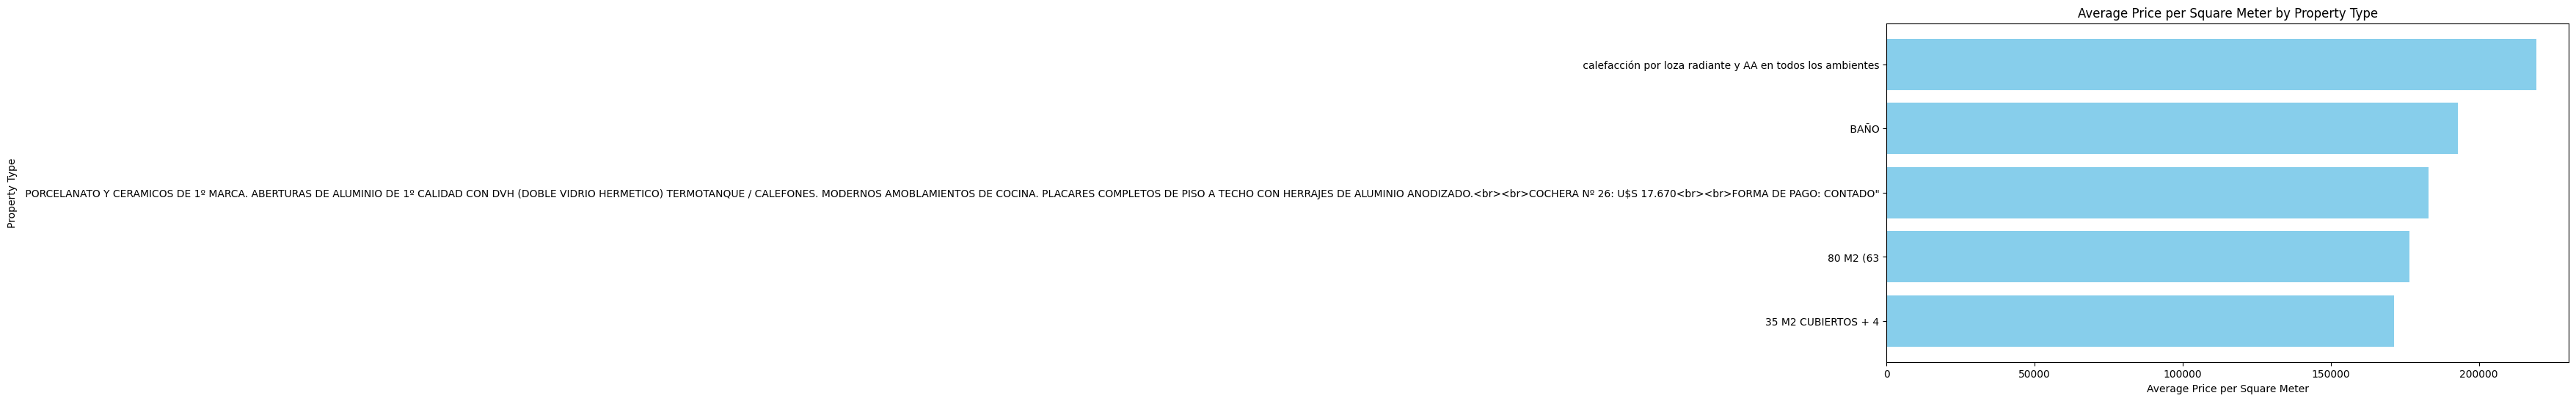

In [ ]:
# Visualize the average price per square meter by property type using a bar chart:
property_types = avg_price_per_sqm_by_type.select('property_type').rdd.flatMap(lambda x: x).collect()
avg_price_per_sqm = avg_price_per_sqm_by_type.select('avg(price_per_sqm)').rdd.flatMap(lambda x: x).collect()

plt.figure(figsize=(12, 6))
plt.barh(property_types[:5], avg_price_per_sqm[:5], color='skyblue')
plt.xlabel('Average Price per Square Meter')
plt.ylabel('Property Type')
plt.title('Average Price per Square Meter by Property Type')
plt.gca().invert_yaxis()
plt.show()

In [ ]:
# distribution of properties based on 'l1', 'l2', and 'l3' (location) columns:
location_counts = combined_df.groupBy('l1', 'l2', 'l3').count().orderBy('count', ascending=False)

location_counts.show()



+---------+--------------------+--------------+-----+
|       l1|                  l2|            l3|count|
+---------+--------------------+--------------+-----+
|Argentina|     Capital Federal|       Palermo| 3162|
|Argentina|            Santa Fe|       Rosario| 2568|
|Argentina|Bs.As. G.B.A. Zon...|         Tigre| 2122|
|Argentina|     Capital Federal|      Belgrano| 1802|
|Argentina|     Capital Federal|      Recoleta| 1219|
|Argentina|Bs.As. G.B.A. Zon...|         Pilar| 1116|
|Argentina|Bs.As. G.B.A. Zon...|      La Plata| 1077|
|Argentina|Bs.As. G.B.A. Zon...|    San Isidro| 1071|
|Argentina|Bs.As. G.B.A. Zon...| Vicente López|  967|
|Argentina|     Capital Federal|     Caballito|  872|
|Argentina|             Córdoba|       Córdoba|  819|
|Argentina|     Capital Federal|  Villa Crespo|  731|
|Argentina|     Capital Federal|       Almagro|  697|
|Argentina|     Capital Federal|  Barrio Norte|  672|
|Argentina|Bs.As. G.B.A. Zon...|         Morón|  578|
|Argentina|     Capital Fede

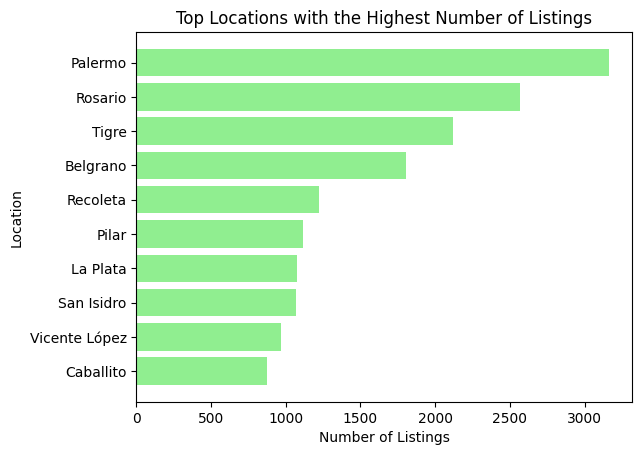

In [ ]:
# top locations with the highest number of listings using a bar chart:

locations = location_counts.select('l3').rdd.flatMap(lambda x: x).collect()
listing_counts = location_counts.select('count').rdd.flatMap(lambda x: x).collect()
plt.barh(locations[:10], listing_counts[:10], color='lightgreen')
plt.xlabel('Number of Listings')
plt.ylabel('Location')
plt.title('Top Locations with the Highest Number of Listings')
plt.gca().invert_yaxis()
plt.show()
